In [469]:
import os
os.getcwd()


'C:\\Users\\E100579\\OneDrive - Normet Group Oy\\Desktop\\others\\others\\data'

In [470]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder 
%matplotlib inline


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics


In [471]:
DF=pd.read_excel("C:/Users/E100579/Desktop/3. DSR Normet.xlsx",header=[1])

C:\Users\E100579\Anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


In [472]:
DF

,Mines,OEM,Fleet,Type,Local Name,SAP Tag,Contractual time,Scheduled Maintenance HMR,Scheduled Maintenance Date,Engine HMR,...,No of oil samples taken,RCA Qualification,Breakdown ID,SM Deviation,SM deviation approval,SM deviation reason,Excess SM,Root Cause,Root cause category,Date of RCA Done
0,Balaria,Normet,Service,Expl. Carrier,MM-5,-,4.0,155.0,2021-04-01,156.0,...,NaN,No,--Planned Maint.-MAINTENANCE-44287,NaN,NaN,NaN,-1,NaN,NaN,NaN
1,Balaria,Normet,Service,PC,PC-7,ZMX-PC-07,20.0,3500.0,2021-04-13,3410.0,...,5.0,No,ZMX-PC-07-Sch. Maint. LHD/LPDT/Service-MAINTEN...,-0.180000,Yes,3500 Hrs. maintenance done along with 3250 Hrs...,0.0,NaN,NaN,NaN
2,Balaria,Normet,Service,PC,PC-7,ZMX-PC-07,NaN,NaN,NaT,3410.0,...,NaN,Yes,ZMX-PC-07-OEM-POWER_TRAIN-44287,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Balaria,Normet,Service,Scissor Lift,SL-6,ZMX-SERVICE-MOSL6,NaN,NaN,NaT,12916.0,...,NaN,No,ZMX-SERVICE-MOSL6-OEM-ELECTRICAL_SYSTEMS-44287,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Balaria,Normet,Service,Scissor Lift,SL-8,ZMX-LHD-SL8,24.0,2000.0,2021-04-07,2028.0,...,5.0,No,ZMX-LHD-SL8-Sch. Maint. LHD/LPDT/Service-MAINT...,0.042042,NaN,NaN,-21.5,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4865,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,...,NaN,NaN,---,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4866,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,...,NaN,NaN,---,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4867,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,...,NaN,NaN,---,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4868,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,...,NaN,NaN,---,NaN,NaN,NaN,NaN,NaN,NaN,NaN


DF.drop(DF.index[0:4000], inplace=True)

In [473]:
DF.loc[3]

Mines                                                                                   Balaria
OEM                                                                                      Normet
Fleet                                                                                   Service
Type                                                                               Scissor Lift
Local Name                                                                                 SL-6
SAP Tag                                                                       ZMX-SERVICE-MOSL6
Contractual time                                                                            NaN
Scheduled Maintenance HMR                                                                   NaN
Scheduled Maintenance Date                                                                  NaT
Engine HMR                                                                              12916.0
Percussion 1 HMR                        

In [474]:
dashboard=pd.read_excel('C:/Users/E100579/Desktop/2. Dashboard.xlsx',header=[1])

In [475]:
dashboard['Local Name']=dashboard['Local Number']

In [476]:
final_df=pd.merge(DF,dashboard,on='Local Name', how='left')

In [477]:
final_df

,Mines,OEM,Fleet,Type,Local Name,SAP Tag,Contractual time,Scheduled Maintenance HMR,Scheduled Maintenance Date,Engine HMR,...,Model No.,Group,Contract Type,Engine Sl. No.,Make,Model,Capacity,Commissioning Date,Location,Operation Start Date
0,Balaria,Normet,Service,Expl. Carrier,MM-5,-,4.0,155.0,2021-04-01,156.0,...,Multimec MF100,1.0,CPH,12472376.0,Deutz,TCD 2013 L04 2V,120 KW/161 HP,2020-10-05,Balaria,2021-01-07
1,Balaria,Normet,Service,PC,PC-7,ZMX-PC-07,20.0,3500.0,2021-04-13,3410.0,...,Utimec MF 328 Per,1.0,CPH,12509602.0,Deutz,TCD 2013 L04 2V,120 kW/161 HP,2020-07-07,Balaria,NaT
2,Balaria,Normet,Service,PC,PC-7,ZMX-PC-07,NaN,NaN,NaT,3410.0,...,Utimec MF 328 Per,1.0,CPH,12509602.0,Deutz,TCD 2013 L04 2V,120 kW/161 HP,2020-07-07,Balaria,NaT
3,Balaria,Normet,Service,Scissor Lift,SL-6,ZMX-SERVICE-MOSL6,NaN,NaN,NaT,12916.0,...,Utilift 6330X,1.0,AMC (Rebuild),12322428.0,Deutz,TCD 2012 L04 2V,96 KW/129 HP,2019-04-26,Balaria,NaT
4,Balaria,Normet,Service,Scissor Lift,SL-8,ZMX-LHD-SL8,24.0,2000.0,2021-04-07,2028.0,...,Utilift MF540,1.0,CPH,12487392.0,Deutz,TCD 2013 L04,120 KW/161 HP,2020-06-27,Balaria,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4865,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaT
4866,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaT
4867,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaT
4868,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaT


In [478]:
final_df.shape

(4870, 56)

In [479]:
final_df.isnull().sum()

Mines                                         2321
OEM                                           2321
Fleet                                         2321
Type                                          2321
Local Name                                    2321
SAP Tag                                       1926
Contractual time                              3932
Scheduled Maintenance HMR                     3932
Scheduled Maintenance Date                    3931
Engine HMR                                    2321
Percussion 1 HMR                              4870
Percussion 2 HMR                              4870
Breakdown Type                                2321
Damage sign off                               4676
BD1 Description                               2321
Object                                        2323
Sub object                                    2335
Damage                                        2694
Cause                                         2401
Object Code                    

In [480]:
final_df['Damage'].unique()

array(['WEEKLY MAINTENANCE', '500 HR MAINTENANCE', 'INTERNAL LEAKAGE',
       'FUES', '1000 HR MAINTENANCE', 'HOSE BUST', 'PLANNED MAINTENANCE',
       'FILTER', 'SWITCH', nan, 'IGNITION SWITCH', 'MECHANISM',
       'RUBBER BUSH', 'Pipe', 'RAILING', 'PIN', 'WORN OUT', 'PUNCTURE',
       'PRESSURE REGULATING VALVE ', '250 HR MAINTENANCE', 'BACKLOG',
       'Bolt', 'VALVE', 'ACCUMULATOR', 'NOT AVAILABLE', 'CAGE', 'HARNESS',
       'FITTINGS', 'NOZZLE', 'CHOCK', 'CHISEL', 'LIMIT SWITCH',
       'ACCELERATOR', 'Guard', 'DAMAGE EXTERNALLY',
       'DIESEL BROWSER NOT AVAILABLE', 'HYD CYLINDER', 'CROSS JOINT',
       'PLANETARY  GEAR / NEEDLE', 'NUT/STUDS ', 'RELAY', 'RE-FILL',
       'VOLTAGE LOW', 'RUBBING', 'FAULTY', 'Pin', 'FUSE',
       'PIN LOCK BOLT /NUT', 'CONNECTOR', 'LOOSE CONNECTION',
       'CHECK VALVE', 'RADIATOR ', 'MOUNTING', 'SENSOR',
       'HOSE FITTING DAMAGE', 'SEAL KIT', 'EXTERNAL LEAKAGE', 'BROKEN',
       'COMPONENT CRACK/ DAMAGE', 'CYLINDER', 'Fuel Line', 'FUSE TRIPP

In [481]:
final_df['Cause'].unique()

array(['PM DONE', 'LEAKAGE', 'BROKEN', 'CHANGE', 'LOOSE', 'MALFUNCTION',
       'DAMAGE', 'WORN OUT', 'CRACK', 'PUNCTURE', 'MISSING', 'FAULTY',
       'IMPROPER USE/OPERATOR FAULT', 'WATER', 'Top-up', 'CHOKE', 'SHORT',
       'DISCHARGE', 'DIESEL NOT AVAILABLE', 'TRIPPED', 'NOT AVAILABLE',
       'WELDING', 'OIL NOT AVAILABLE', 'HEATING', 'PLAY', 'SMOKE',
       'OPERATION ISSUE', 'Bend', 'PRESSURE NOT ADEQUATE', nan,
       'ABNORMAL SOUND', 'MACHINE NOT SHIFTED TO WORSHOP',
       'STUCK/NOT ROTATING', 'INDICATION ERROR'], dtype=object)

In [482]:
final_df.drop(final_df.index[2549:4870], inplace=True)

In [483]:
missing_values=[feature for feature in final_df if (final_df[feature].isnull().sum()/len(final_df)>0.3)]
missing_values

['Contractual time',
 'Scheduled Maintenance HMR',
 'Scheduled Maintenance Date',
 'Percussion 1 HMR',
 'Percussion 2 HMR',
 'Damage sign off',
 'Object Code',
 'Sub Object Code',
 'Damage Code',
 'Cause Code',
 'BD2 Description',
 'Is the bd covered in the last PM activity?',
 'Non value adding activity',
 'Non value adding activities hrs',
 'No of oil samples taken',
 'SM Deviation',
 'SM deviation approval',
 'SM deviation reason',
 'Excess SM',
 'Root Cause',
 'Root cause category',
 'Date of RCA Done',
 'Operation Start Date']

In [484]:
final_df.drop(final_df[missing_values], axis=1, inplace=True)

In [485]:
[features for features in final_df.columns if final_df[features].isnull().sum()>0]

['Object',
 'Sub object',
 'Damage',
 'Cause',
 'End of Malfunction (Date)',
 'End of Malfunction (Time)',
 'RCA Qualification',
 'Breakdown ID',
 'Machine Type',
 'Sl.',
 'Local Number',
 'M/c Sl. No.',
 'Model No.',
 'Group',
 'Contract Type',
 'Engine Sl. No.',
 'Make',
 'Model',
 'Capacity',
 'Commissioning Date',
 'Location']

In [486]:
final_df.isnull().sum()

Mines                            0
OEM                              0
Fleet                            0
Type                             0
Local Name                       0
SAP Tag                          0
Engine HMR                       0
Breakdown Type                   0
BD1 Description                  0
Object                           2
Sub object                      14
Damage                         373
Cause                           80
Start of Malfunction (Date)      0
Start of Malfunction (Time)      0
End of Malfunction (Date)        5
End of Malfunction (Time)        5
Breakdown Duration in Hours      0
RCA Qualification                1
Breakdown ID                     1
Machine Type                     1
Sl.                              1
Local Number                     1
M/c Sl. No.                      1
Model No.                        1
Group                            1
Contract Type                    1
Engine Sl. No.                   1
Make                

In [487]:
final_df[final_df['Damage'].isnull()].index

Int64Index([   9,   55,   61,  108,  117,  120,  132,  133,  159,  185,
            ...
            2514, 2519, 2520, 2527, 2529, 2533, 2536, 2538, 2544, 2547],
           dtype='int64', length=373)

In [488]:
final_df[final_df['Breakdown ID'].isnull()].index

Int64Index([2499], dtype='int64')

In [489]:
final_df.drop(final_df.index[a], inplace=True)

In [490]:
final_df[final_df['Breakdown ID'].isnull()].index

Int64Index([2499], dtype='int64')

In [491]:
final_df.drop([2499], inplace=True)

<AxesSubplot:>

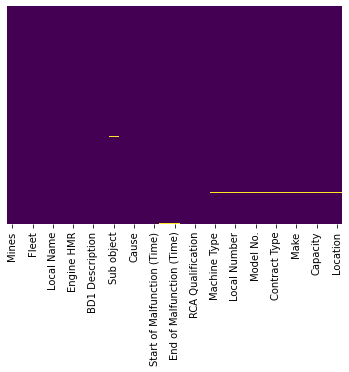

In [492]:
sns.heatmap(final_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [493]:
##To check Data Types
final_df.dtypes

Mines                                  object
OEM                                    object
Fleet                                  object
Type                                   object
Local Name                             object
SAP Tag                                object
Engine HMR                            float64
Breakdown Type                         object
BD1 Description                        object
Object                                 object
Sub object                             object
Damage                                 object
Cause                                  object
Start of Malfunction (Date)    datetime64[ns]
Start of Malfunction (Time)            object
End of Malfunction (Date)      datetime64[ns]
End of Malfunction (Time)              object
Breakdown Duration in Hours           float64
RCA Qualification                      object
Breakdown ID                           object
Machine Type                           object
Sl.                               

In [494]:
final_df.isnull().sum()

Mines                          0
OEM                            0
Fleet                          0
Type                           0
Local Name                     0
SAP Tag                        0
Engine HMR                     0
Breakdown Type                 0
BD1 Description                0
Object                         0
Sub object                     8
Damage                         0
Cause                          2
Start of Malfunction (Date)    0
Start of Malfunction (Time)    0
End of Malfunction (Date)      3
End of Malfunction (Time)      3
Breakdown Duration in Hours    0
RCA Qualification              0
Breakdown ID                   0
Machine Type                   1
Sl.                            1
Local Number                   1
M/c Sl. No.                    1
Model No.                      1
Group                          1
Contract Type                  1
Engine Sl. No.                 1
Make                           1
Model                          1
Capacity  

In [495]:
final_df[final_df['Machine Type'].isnull()].index

Int64Index([2126], dtype='int64')

In [496]:
final_df.drop([2126], inplace=True)


In [497]:
final_df[final_df['End of Malfunction (Time)'].isnull()].index

Int64Index([2542, 2543, 2548], dtype='int64')

In [498]:
final_df.drop([2542, 2543, 2548], inplace=True)

In [499]:
final_df[final_df['Sub object'].isnull()].index
final_df.drop([1119, 1316, 1397, 1447, 1448, 1456, 1459, 1755], inplace=True)

In [500]:
final_df[final_df['Cause'].isnull()].index
final_df.drop([1066], inplace=True)

([<matplotlib.patches.Wedge at 0x21fc345ddc0>,
 [Text(-0.5915672129922462, 0.927387854412913, '1.0'),
  Text(0.5915672998205612, -0.9273877990263891, '0.0')],
 [Text(-0.32267302526849795, 0.5058479205888616, '68.07%'),
  Text(0.322673072629397, -0.5058478903780304, '31.93%')])

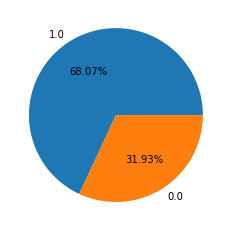

In [501]:
## Pie Chart- Top 2 groups  that 
plt.pie(Group_value[:2],labels=Group_type[:2],autopct='%1.2f%%')

In [502]:
final_df

,Mines,OEM,Fleet,Type,Local Name,SAP Tag,Engine HMR,Breakdown Type,BD1 Description,Object,...,M/c Sl. No.,Model No.,Group,Contract Type,Engine Sl. No.,Make,Model,Capacity,Commissioning Date,Location
0,Balaria,Normet,Service,Expl. Carrier,MM-5,-,156.0,Planned Maint.,WM carried out,MAINTENANCE,...,GE220,Multimec MF100,1.0,CPH,12472376.0,Deutz,TCD 2013 L04 2V,120 KW/161 HP,2020-10-05,Balaria
1,Balaria,Normet,Service,PC,PC-7,ZMX-PC-07,3410.0,Sch. Maint. LHD/LPDT/Service,SM (3250+3500 Hrs.) carried out,MAINTENANCE,...,HD430,Utimec MF 328 Per,1.0,CPH,12509602.0,Deutz,TCD 2013 L04 2V,120 kW/161 HP,2020-07-07,Balaria
2,Balaria,Normet,Service,PC,PC-7,ZMX-PC-07,3410.0,OEM,B/D due to both axle replacement work against ...,POWER_TRAIN,...,HD430,Utimec MF 328 Per,1.0,CPH,12509602.0,Deutz,TCD 2013 L04 2V,120 kW/161 HP,2020-07-07,Balaria
3,Balaria,Normet,Service,Scissor Lift,SL-6,ZMX-SERVICE-MOSL6,12916.0,OEM,B/D due to starting problem/Fuse 75A broken (r...,ELECTRICAL_SYSTEMS,...,DA852,Utilift 6330X,1.0,AMC (Rebuild),12322428.0,Deutz,TCD 2012 L04 2V,96 KW/129 HP,2019-04-26,Balaria
4,Balaria,Normet,Service,Scissor Lift,SL-8,ZMX-LHD-SL8,2028.0,Sch. Maint. LHD/LPDT/Service,SM (2000 Hrs.) carried out,MAINTENANCE,...,DM208,Utilift MF540,1.0,CPH,12487392.0,Deutz,TCD 2013 L04,120 KW/161 HP,2020-06-27,Balaria
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2539,Baroi,Normet,Service,Diesel Bowser,MM-3,ZMX-MM-03,6129.0,OEM,B/d due to camera not working (Fuse missing/ne...,ELECTRICAL_SYSTEMS,...,GE179,Multimec MF100,1.0,CPH,12063400.0,Deutz,TCD 2013 L04 2V,120 kW/161 HP,2017-11-15,Baroi
2540,Baroi,Normet,Service,Expl. Carrier,MM-4,ZMX-MM-04,5529.0,Sch. Maint. LHD/LPDT/Service,SM (5500 Hrs.) Carried Out,MAINTENANCE,...,GE177,Multimec MF100,1.0,CPH,12067652.0,Deutz,TCD 2013 L04 2V,120 kW/161 HP,2017-12-02,Baroi
2541,Baroi,Normet,Service,Scaler,SC-3,ZMX-SERV-SC3,2339.0,OEM,B/d due to hammer water spray not working (Air...,WATER_FLUSHING_SYS,...,FB238,Scamec 2000 M,3.0,CPH,12472375.0,Deutz,TCD 2013 L04,120 KW/161 HP,2020-09-19,Baroi
2545,Mochia,Normet,Service,Scissor Lift,SL-4,ZMX-SERVICE-MOSL4,12845.0,OP damage,B/d due to OD (Cage railing damaged)/welding done,LOADFRAME,...,DA890,Utilift 6330X,1.0,CPH,12084116.0,Deutz,TCD 2012 L04 2V,96 KW/129 HP,2018-01-01,Mochia


In [503]:
pip install mlxtend

In [504]:
final_df.columns

Index(['Mines', 'OEM', 'Fleet', 'Type', 'Local Name', 'SAP Tag', 'Engine HMR',
       'Breakdown Type', 'BD1 Description', 'Object', 'Sub object', 'Damage',
       'Cause', 'Start of Malfunction (Date)', 'Start of Malfunction (Time)',
       'End of Malfunction (Date)', 'End of Malfunction (Time)',
       'Breakdown Duration in Hours', 'RCA Qualification', 'Breakdown ID',
       'Machine Type', 'Sl.', 'Local Number', 'M/c Sl. No.', 'Model No.',
       'Group', 'Contract Type', 'Engine Sl. No.', 'Make', 'Model', 'Capacity',
       'Commissioning Date', 'Location'],
      dtype='object')

In [505]:
new_df=final_df.drop(['Mines', 'OEM', 'Fleet','SAP Tag','RCA Qualification','Machine Type', 'Local Number', 'M/c Sl. No.',
                      'Contract Type', 'Make', 'Model', 'Location'], axis=1)

In [506]:
new_df.columns

Index(['Type', 'Local Name', 'Engine HMR', 'Breakdown Type', 'BD1 Description',
       'Object', 'Sub object', 'Damage', 'Cause',
       'Start of Malfunction (Date)', 'Start of Malfunction (Time)',
       'End of Malfunction (Date)', 'End of Malfunction (Time)',
       'Breakdown Duration in Hours', 'Breakdown ID', 'Sl.', 'Model No.',
       'Group', 'Engine Sl. No.', 'Capacity', 'Commissioning Date'],
      dtype='object')

In [507]:
new_df.isnull().sum()

Type                           0
Local Name                     0
Engine HMR                     0
Breakdown Type                 0
BD1 Description                0
Object                         0
Sub object                     0
Damage                         0
Cause                          0
Start of Malfunction (Date)    0
Start of Malfunction (Time)    0
End of Malfunction (Date)      0
End of Malfunction (Time)      0
Breakdown Duration in Hours    0
Breakdown ID                   0
Sl.                            0
Model No.                      0
Group                          0
Engine Sl. No.                 0
Capacity                       0
Commissioning Date             0
dtype: int64

In [508]:
# list of numerical variables
numerical_features = [feature for feature in new_df.columns if new_df[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
new_df[numerical_features].head()

Number of numerical variables:  8


,Engine HMR,Start of Malfunction (Date),End of Malfunction (Date),Breakdown Duration in Hours,Sl.,Group,Engine Sl. No.,Commissioning Date
0,156.0,2021-04-01,2021-04-01,3.0,1.0,1.0,12472376.0,2020-10-05
1,3410.0,2021-04-01,2021-04-02,20.0,3.0,1.0,12509602.0,2020-07-07
2,3410.0,2021-04-01,2021-04-03,59.0,3.0,1.0,12509602.0,2020-07-07
3,12916.0,2021-04-01,2021-04-02,11.0,9.0,1.0,12322428.0,2019-04-26
4,2028.0,2021-04-01,2021-04-01,2.5,10.0,1.0,12487392.0,2020-06-27


In [509]:
new_df['Commissioning Date'].dtypes

dtype('<M8[ns]')

In [510]:
# list of Categorial variables
cat_features = [feature for feature in new_df.columns if new_df[feature].dtypes == 'O']

print('Number of categorial variables: ', len(cat_features))

# visualise the categorial variables
new_df[cat_features].head()

Number of categorial variables:  13


,Type,Local Name,Breakdown Type,BD1 Description,Object,Sub object,Damage,Cause,Start of Malfunction (Time),End of Malfunction (Time),Breakdown ID,Model No.,Capacity
0,Expl. Carrier,MM-5,Planned Maint.,WM carried out,MAINTENANCE,LHD/LPDT/SERVICE MAINTENANCE,WEEKLY MAINTENANCE,PM DONE,09:00:00,12:00:00,--Planned Maint.-MAINTENANCE-44287,Multimec MF100,120 KW/161 HP
1,PC,PC-7,Sch. Maint. LHD/LPDT/Service,SM (3250+3500 Hrs.) carried out,MAINTENANCE,LHD/LPDT/SERVICE MAINTENANCE,500 HR MAINTENANCE,PM DONE,12:00:00,08:00:00,ZMX-PC-07-Sch. Maint. LHD/LPDT/Service-MAINTEN...,Utimec MF 328 Per,120 kW/161 HP
2,PC,PC-7,OEM,B/D due to both axle replacement work against ...,POWER_TRAIN,REAR AXLE,INTERNAL LEAKAGE,LEAKAGE,12:00:00,23:00:00,ZMX-PC-07-OEM-POWER_TRAIN-44287,Utimec MF 328 Per,120 kW/161 HP
3,Scissor Lift,SL-6,OEM,B/D due to starting problem/Fuse 75A broken (r...,ELECTRICAL_SYSTEMS,ENGINE STARTING CIRCUIT,FUES,BROKEN,15:00:00,02:00:00,ZMX-SERVICE-MOSL6-OEM-ELECTRICAL_SYSTEMS-44287,Utilift 6330X,96 KW/129 HP
4,Scissor Lift,SL-8,Sch. Maint. LHD/LPDT/Service,SM (2000 Hrs.) carried out,MAINTENANCE,LHD/LPDT/SERVICE MAINTENANCE,1000 HR MAINTENANCE,PM DONE,01:00:00,03:30:00,ZMX-LHD-SL8-Sch. Maint. LHD/LPDT/Service-MAINT...,Utilift MF540,120 KW/161 HP


In [511]:
new_df['Commissioning Date']=new_df['Commissioning Date'].apply(pd.to_datetime)

In [512]:
new_df['End of Malfunction (Date)']=new_df['End of Malfunction (Date)'].apply(pd.to_datetime)

In [513]:
new_df['Start of Malfunction (Date)']=new_df['Start of Malfunction (Date)'].apply(pd.to_datetime)

In [514]:
new_df['days']=(new_df['End of Malfunction (Date)']-new_df['Commissioning Date']).dt.days

In [515]:
new_df['days']

0        178
1        269
2        270
3        707
4        278
        ... 
2539    1456
2540    1439
2541     417
2545    1409
2546     471
Name: days, Length: 2162, dtype: int64

In [516]:
new_df

,Type,Local Name,Engine HMR,Breakdown Type,BD1 Description,Object,Sub object,Damage,Cause,Start of Malfunction (Date),...,End of Malfunction (Time),Breakdown Duration in Hours,Breakdown ID,Sl.,Model No.,Group,Engine Sl. No.,Capacity,Commissioning Date,days
0,Expl. Carrier,MM-5,156.0,Planned Maint.,WM carried out,MAINTENANCE,LHD/LPDT/SERVICE MAINTENANCE,WEEKLY MAINTENANCE,PM DONE,2021-04-01,...,12:00:00,3.0,--Planned Maint.-MAINTENANCE-44287,1.0,Multimec MF100,1.0,12472376.0,120 KW/161 HP,2020-10-05,178
1,PC,PC-7,3410.0,Sch. Maint. LHD/LPDT/Service,SM (3250+3500 Hrs.) carried out,MAINTENANCE,LHD/LPDT/SERVICE MAINTENANCE,500 HR MAINTENANCE,PM DONE,2021-04-01,...,08:00:00,20.0,ZMX-PC-07-Sch. Maint. LHD/LPDT/Service-MAINTEN...,3.0,Utimec MF 328 Per,1.0,12509602.0,120 kW/161 HP,2020-07-07,269
2,PC,PC-7,3410.0,OEM,B/D due to both axle replacement work against ...,POWER_TRAIN,REAR AXLE,INTERNAL LEAKAGE,LEAKAGE,2021-04-01,...,23:00:00,59.0,ZMX-PC-07-OEM-POWER_TRAIN-44287,3.0,Utimec MF 328 Per,1.0,12509602.0,120 kW/161 HP,2020-07-07,270
3,Scissor Lift,SL-6,12916.0,OEM,B/D due to starting problem/Fuse 75A broken (r...,ELECTRICAL_SYSTEMS,ENGINE STARTING CIRCUIT,FUES,BROKEN,2021-04-01,...,02:00:00,11.0,ZMX-SERVICE-MOSL6-OEM-ELECTRICAL_SYSTEMS-44287,9.0,Utilift 6330X,1.0,12322428.0,96 KW/129 HP,2019-04-26,707
4,Scissor Lift,SL-8,2028.0,Sch. Maint. LHD/LPDT/Service,SM (2000 Hrs.) carried out,MAINTENANCE,LHD/LPDT/SERVICE MAINTENANCE,1000 HR MAINTENANCE,PM DONE,2021-04-01,...,03:30:00,2.5,ZMX-LHD-SL8-Sch. Maint. LHD/LPDT/Service-MAINT...,10.0,Utilift MF540,1.0,12487392.0,120 KW/161 HP,2020-06-27,278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2539,Diesel Bowser,MM-3,6129.0,OEM,B/d due to camera not working (Fuse missing/ne...,ELECTRICAL_SYSTEMS,Camera,FUES,MISSING,2021-11-10,...,19:00:00,0.5,ZMX-MM-03-OEM-ELECTRICAL_SYSTEMS-44510,16.0,Multimec MF100,1.0,12063400.0,120 kW/161 HP,2017-11-15,1456
2540,Expl. Carrier,MM-4,5529.0,Sch. Maint. LHD/LPDT/Service,SM (5500 Hrs.) Carried Out,MAINTENANCE,LHD/LPDT/SERVICE MAINTENANCE,500 HR MAINTENANCE,PM DONE,2021-11-10,...,23:00:00,3.0,ZMX-MM-04-Sch. Maint. LHD/LPDT/Service-MAINTEN...,17.0,Multimec MF100,1.0,12067652.0,120 kW/161 HP,2017-12-02,1439
2541,Scaler,SC-3,2339.0,OEM,B/d due to hammer water spray not working (Air...,WATER_FLUSHING_SYS,WASHING NOZZLE/HOSE REEL,Pipe,CHOKE,2021-11-10,...,23:00:00,16.0,ZMX-SERV-SC3-OEM-WATER_FLUSHING_SYS-44510,25.0,Scamec 2000 M,3.0,12472375.0,120 KW/161 HP,2020-09-19,417
2545,Scissor Lift,SL-4,12845.0,OP damage,B/d due to OD (Cage railing damaged)/welding done,LOADFRAME,plaTFORM,RAILING,DAMAGE,2021-11-10,...,13:00:00,7.0,ZMX-SERVICE-MOSL4-OP damage-LOADFRAME-44510,38.0,Utilift 6330X,1.0,12084116.0,96 KW/129 HP,2018-01-01,1409


In [517]:
new_df.columns

Index(['Type', 'Local Name', 'Engine HMR', 'Breakdown Type', 'BD1 Description',
       'Object', 'Sub object', 'Damage', 'Cause',
       'Start of Malfunction (Date)', 'Start of Malfunction (Time)',
       'End of Malfunction (Date)', 'End of Malfunction (Time)',
       'Breakdown Duration in Hours', 'Breakdown ID', 'Sl.', 'Model No.',
       'Group', 'Engine Sl. No.', 'Capacity', 'Commissioning Date', 'days'],
      dtype='object')

In [518]:
new_df=new_df.drop(['Start of Malfunction (Time)','End of Malfunction (Time)'], axis=1)

In [519]:
new_df=new_df.drop(['Start of Malfunction (Date)','End of Malfunction (Date)'], axis=1)

In [520]:
new_df=new_df.drop(['Commissioning Date'], axis=1)

In [521]:
# list of Categorial variables
cat_features = [feature for feature in new_df.columns if new_df[feature].dtypes == 'O']

print('Number of categorial variables: ', len(cat_features))

# visualise the categorial variables
new_df[cat_features].head()

Number of categorial variables:  11


,Type,Local Name,Breakdown Type,BD1 Description,Object,Sub object,Damage,Cause,Breakdown ID,Model No.,Capacity
0,Expl. Carrier,MM-5,Planned Maint.,WM carried out,MAINTENANCE,LHD/LPDT/SERVICE MAINTENANCE,WEEKLY MAINTENANCE,PM DONE,--Planned Maint.-MAINTENANCE-44287,Multimec MF100,120 KW/161 HP
1,PC,PC-7,Sch. Maint. LHD/LPDT/Service,SM (3250+3500 Hrs.) carried out,MAINTENANCE,LHD/LPDT/SERVICE MAINTENANCE,500 HR MAINTENANCE,PM DONE,ZMX-PC-07-Sch. Maint. LHD/LPDT/Service-MAINTEN...,Utimec MF 328 Per,120 kW/161 HP
2,PC,PC-7,OEM,B/D due to both axle replacement work against ...,POWER_TRAIN,REAR AXLE,INTERNAL LEAKAGE,LEAKAGE,ZMX-PC-07-OEM-POWER_TRAIN-44287,Utimec MF 328 Per,120 kW/161 HP
3,Scissor Lift,SL-6,OEM,B/D due to starting problem/Fuse 75A broken (r...,ELECTRICAL_SYSTEMS,ENGINE STARTING CIRCUIT,FUES,BROKEN,ZMX-SERVICE-MOSL6-OEM-ELECTRICAL_SYSTEMS-44287,Utilift 6330X,96 KW/129 HP
4,Scissor Lift,SL-8,Sch. Maint. LHD/LPDT/Service,SM (2000 Hrs.) carried out,MAINTENANCE,LHD/LPDT/SERVICE MAINTENANCE,1000 HR MAINTENANCE,PM DONE,ZMX-LHD-SL8-Sch. Maint. LHD/LPDT/Service-MAINT...,Utilift MF540,120 KW/161 HP


In [522]:
# Here I have used label encoding to change my categorial features, so that data can be used for model development.
for feature in cat_features:
    oe = LabelEncoder()
    new_df[feature] = oe.fit_transform(new_df[feature])
    new_df
  

In [523]:
new_df

,Type,Local Name,Engine HMR,Breakdown Type,BD1 Description,Object,Sub object,Damage,Cause,Breakdown Duration in Hours,Breakdown ID,Sl.,Model No.,Group,Engine Sl. No.,Capacity,days
0,2,8,156.0,3,1295,16,88,126,19,3.0,26,1.0,3,1.0,12472376.0,0,178
1,4,15,3410.0,4,1212,16,88,4,19,20.0,670,3.0,10,1.0,12509602.0,1,269
2,4,15,3410.0,1,208,19,106,66,12,59.0,657,3.0,10,1.0,12509602.0,1,270
3,7,33,12916.0,1,490,7,52,49,0,11.0,2014,9.0,6,1.0,12322428.0,4,707
4,7,35,2028.0,4,1194,16,88,0,19,2.5,209,10.0,7,1.0,12487392.0,0,278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2539,1,6,6129.0,1,734,7,33,49,15,0.5,365,16.0,3,1.0,12063400.0,1,1456
2540,2,7,5529.0,4,1244,16,88,4,19,3.0,444,17.0,3,1.0,12067652.0,1,1439
2541,6,26,2339.0,1,851,21,136,92,3,16.0,1553,25.0,5,3.0,12472375.0,0,417
2545,7,31,12845.0,2,612,14,148,95,5,7.0,1987,38.0,6,1.0,12084116.0,4,1409


In [524]:
new_df.dtypes

Type                             int32
Local Name                       int32
Engine HMR                     float64
Breakdown Type                   int32
BD1 Description                  int32
Object                           int32
Sub object                       int32
Damage                           int32
Cause                            int32
Breakdown Duration in Hours    float64
Breakdown ID                     int32
Sl.                            float64
Model No.                        int32
Group                          float64
Engine Sl. No.                 float64
Capacity                         int32
days                             int64
dtype: object

In [525]:
correlation = new_df.corr()

<AxesSubplot:>

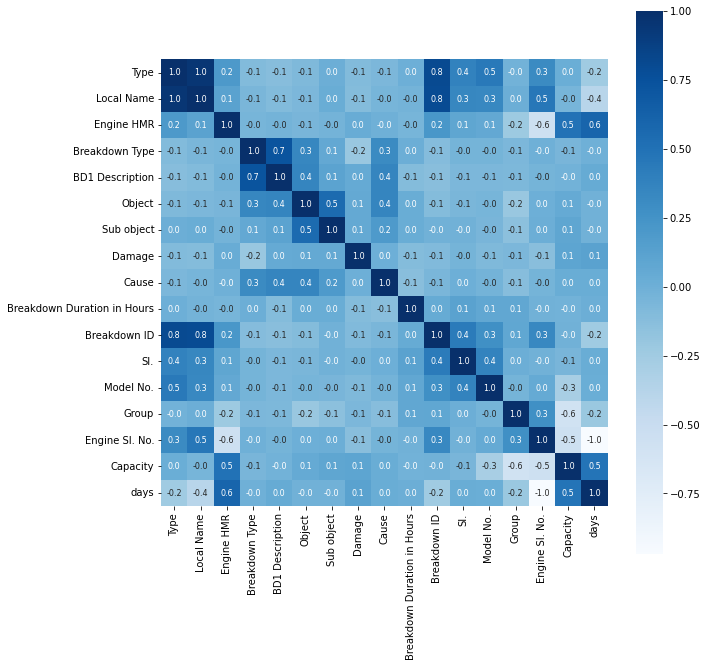

In [526]:
# constructing a heatmap to nderstand the correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [527]:
X = new_df.drop(['Engine HMR'], axis=1)
Y = new_df['Engine HMR']

In [528]:
print(X)
print(Y)

      Type  Local Name  Breakdown Type  BD1 Description  Object  Sub object  \
0        2           8               3             1295      16          88   
1        4          15               4             1212      16          88   
2        4          15               1              208      19         106   
3        7          33               1              490       7          52   
4        7          35               4             1194      16          88   
...    ...         ...             ...              ...     ...         ...   
2539     1           6               1              734       7          33   
2540     2           7               4             1244      16          88   
2541     6          26               1              851      21         136   
2545     7          31               2              612      14         148   
2546     7          36               1              959      13          16   

      Damage  Cause  Breakdown Duration in Hours  B

In [529]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [530]:
print(X.shape, X_train.shape, X_test.shape)

(2162, 16) (1729, 16) (433, 16)


In [531]:
# loading the linear regression model
lin_reg_model = LinearRegression()

In [532]:
# training the model with X_train
lin_reg_model.fit(X_train, Y_train)

LinearRegression()

In [533]:
# accuracy for prediction on training data
training_data_prediction = model.predict(X_train)

In [534]:
print(training_data_prediction)

[14333.003   1206.7197  2810.818  ...  4689.66    2752.1611  6858.856 ]


In [535]:
# R squared error
score_1 = metrics.r2_score(Y_train, training_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_train, training_data_prediction)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared error :  0.9999280510437187
Mean Absolute Error :  25.826842577764932


In [536]:
# accuracy for prediction on test data
test_data_prediction = model.predict(X_test)

In [468]:
# R squared error
score_1 = metrics.r2_score(Y_test, test_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_test, test_data_prediction)

print("R squared error : ", score_1)

R squared error :  0.9917744514007206
